# Problem Statement:
Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

In [3]:
# Importent libreries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#chacking data set

df = pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
# Handle Missing Values

df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [6]:
#information about data set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [7]:
#drop date column because it has no use

df = df.drop(columns=['Date'])
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [8]:
#saparate data into features and target values.


df_continues = df.drop(columns=['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow'])

df_catagorical = df[['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday']].copy()

target = df['RainTomorrow']

In [9]:
#chacking shape of all data

print(df_continues.shape)
print(df_catagorical.shape)
print(target.shape)

(8425, 16)
(8425, 5)
(8425,)


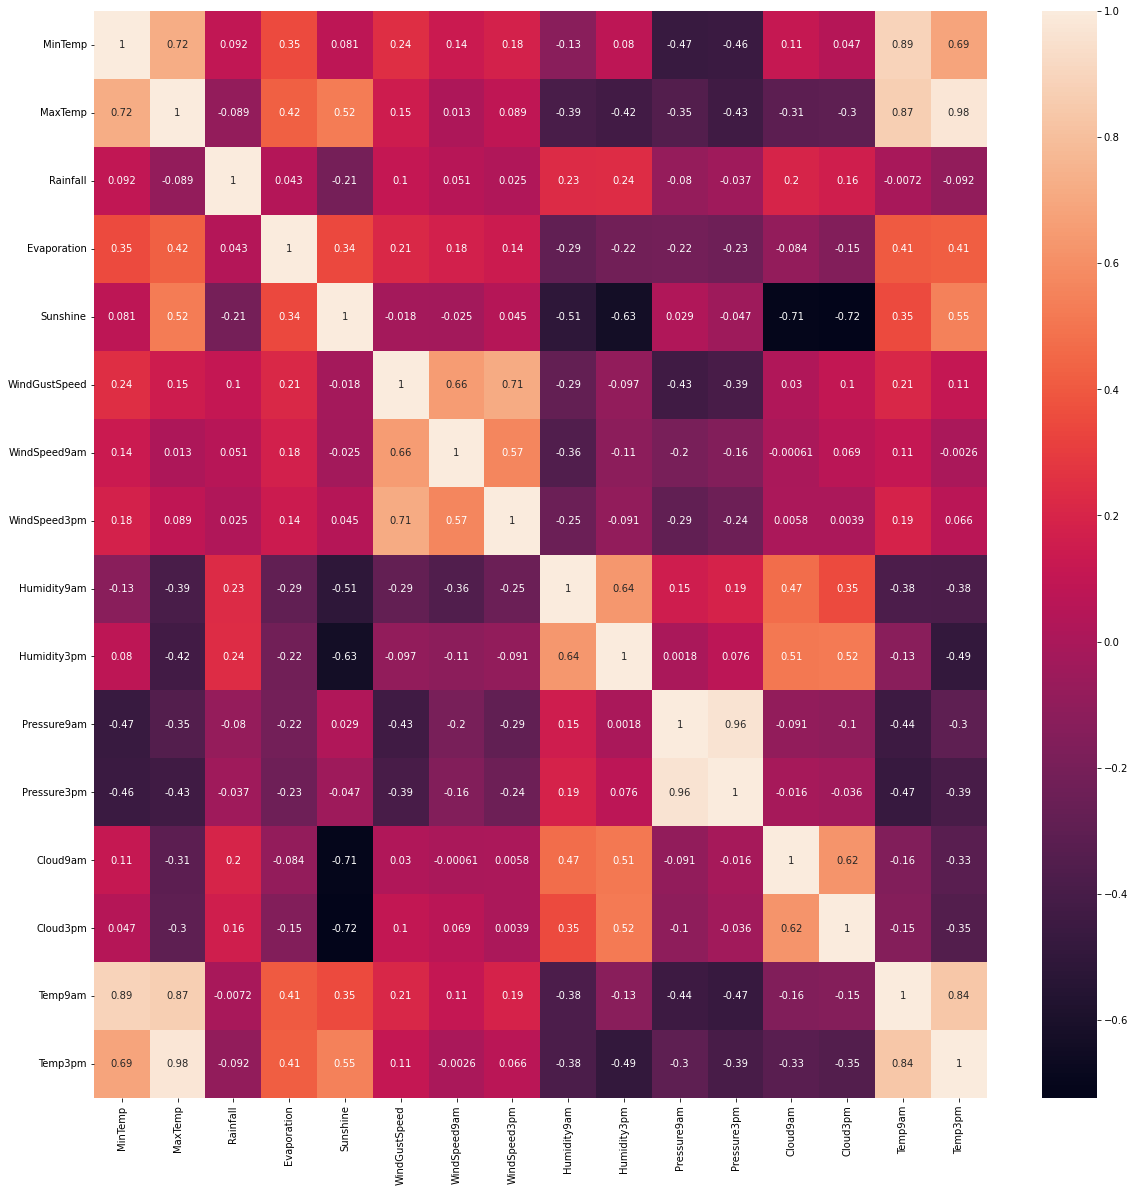

In [10]:
#chacking correlation

plt.figure(figsize=(20,20),facecolor='white')
sns.heatmap(df_continues.corr(),annot=True)
plt.show()


In [11]:
#chacking skewness

df_continues.skew()

MinTemp          -0.089588
MaxTemp           0.379297
Rainfall         13.028837
Evaporation      10.710605
Sunshine         -0.519717
WindGustSpeed     0.711103
WindSpeed9am      0.956250
WindSpeed3pm      0.491069
Humidity9am      -0.255843
Humidity3pm       0.117563
Pressure9am      -0.022133
Pressure3pm      -0.009385
Cloud9am         -0.309417
Cloud3pm         -0.232598
Temp9am          -0.014699
Temp3pm           0.395061
dtype: float64

In [12]:
#lets remove skewness.

for index in df_continues.skew().index:
    if df_continues.skew().loc[index]>0.5:
        df_continues[index] = np.sqrt(df_continues[index])
    if df_continues.skew().loc[index]<-0.5:
        df_continues[index] = np.square(df_continues[index])
        
df_continues.skew().sort_values(ascending=False)

Rainfall         2.929942
Evaporation      1.508382
WindSpeed3pm     0.491069
Temp3pm          0.395061
MaxTemp          0.379297
WindGustSpeed    0.198272
Sunshine         0.197472
Humidity3pm      0.117563
Pressure3pm     -0.009385
Temp9am         -0.014699
Pressure9am     -0.022133
MinTemp         -0.089588
Cloud3pm        -0.232598
Humidity9am     -0.255843
Cloud9am        -0.309417
WindSpeed9am    -0.406839
dtype: float64

In [13]:
#so all values under threshold

from scipy.stats import zscore

z =np.abs(zscore(df_continues))

threshold = 3

print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [14]:
df_continues.isnull().sum()

MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustSpeed     991
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
dtype: int64

In [15]:
df_continues.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,0.768348,2.174158,73.427770,6.233806,3.373998,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,1.488565,0.813983,53.482643,1.146430,1.569739,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,2.645751,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,1.612452,22.565000,5.477226,2.449490,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,2.144761,75.690000,6.244998,3.605551,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,2.645751,114.490000,7.071068,4.472136,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,19.261360,12.041595,193.210000,10.344080,7.937254,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [16]:
# deal with null values

df_continues['Rainfall']= df_continues['Rainfall'].fillna(df_continues['Rainfall'].mean())
df_continues['Evaporation']= df_continues['Evaporation'].fillna(df_continues['Evaporation'].mean())
df_continues['Sunshine']= df_continues['Sunshine'].fillna(df_continues['Sunshine'].mean())
df_continues['WindGustSpeed']= df_continues['WindGustSpeed'].fillna(df_continues['WindGustSpeed'].mean())
df_continues['WindSpeed9am']= df_continues["WindSpeed9am"].fillna(df_continues['WindSpeed9am'].mean())
df_continues['WindSpeed3pm']= df_continues['WindSpeed3pm'].fillna(df_continues['WindSpeed3pm'].mean())
df_continues['Humidity3pm']= df_continues['Humidity3pm'].fillna(df_continues['Humidity3pm'].mean())
df_continues['Humidity9am']= df_continues['Humidity9am'].fillna(df_continues['Humidity9am'].mean())
df_continues['Pressure3pm']= df_continues['Pressure3pm'].fillna(df_continues['Pressure3pm'].mean())
df_continues['Pressure9am']= df_continues['Pressure9am'].fillna(df_continues['Pressure9am'].mean())
df_continues['Cloud3pm']= df_continues['Cloud3pm'].fillna(df_continues['Cloud3pm'].mean())
df_continues['Cloud9am']= df_continues['Cloud9am'].fillna(df_continues['Cloud9am'].mean())
df_continues['Temp3pm']= df_continues['Temp3pm'].fillna(df_continues['Temp3pm'].mean())
df_continues['Temp9am']= df_continues['Temp9am'].fillna(df_continues['Temp9am'].mean())
df_continues['MinTemp']= df_continues['MinTemp'].fillna(df_continues['MinTemp'].mean())
df_continues['MaxTemp']= df_continues['MaxTemp'].fillna(df_continues['MaxTemp'].mean())

In [17]:


df_continues.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [18]:
df_continues.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,0.768348,2.174158,73.427770,6.233806,3.373998,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.379488,6.114516,1.467207,0.621563,38.784263,1.076888,1.562642,9.704759,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849
min,-2.000000,8.200000,0.000000,0.000000,0.000000,2.645751,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.300000,19.300000,0.000000,2.000000,70.560000,5.567764,2.449490,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000
50%,13.200000,23.300000,0.000000,2.174158,73.427770,6.233806,3.605551,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000
75%,17.300000,28.000000,0.894427,2.280351,79.210000,6.928203,4.472136,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000
max,28.500000,45.500000,19.261360,12.041595,193.210000,10.344080,7.937254,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [19]:
#chacking null in catagorical data

df_catagorical.isnull().sum()

Location         0
WindGustDir    991
WindDir9am     829
WindDir3pm     308
RainToday      240
dtype: int64

In [20]:
df_catagorical['RainToday'].value_counts()

No     6195
Yes    1990
Name: RainToday, dtype: int64

In [21]:
# fill null values in catagorical data

df_catagorical['WindGustDir'] = df_catagorical['WindGustDir'].fillna(df_catagorical['WindGustDir'].mode())
df_catagorical['WindDir9am'] = df_catagorical['WindDir9am'].fillna(df_catagorical['WindDir9am'].mode())
df_catagorical['WindDir3pm'] = df_catagorical['WindDir3pm'].fillna(df_catagorical['WindDir3pm'].mode())
df_catagorical['RainToday'] = df_catagorical['RainToday'].fillna(df_catagorical['RainToday'].mode())


In [22]:
target.value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

In [23]:
target.isnull().sum()

239

In [24]:
target.mode()

0    No
Name: RainTomorrow, dtype: object

In [25]:
# fill No in null rows

target  = target.fillna('No')

In [26]:
target = target.replace({'No':0,'Yes':1})

In [27]:
print(df_continues.shape)
print(df_catagorical.shape)
print(target.shape)

(8425, 16)
(8425, 5)
(8425,)


In [28]:
# join both data

final_df = df_continues.join(df_catagorical)

In [29]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        8425 non-null   float64
 1   MaxTemp        8425 non-null   float64
 2   Rainfall       8425 non-null   float64
 3   Evaporation    8425 non-null   float64
 4   Sunshine       8425 non-null   float64
 5   WindGustSpeed  8425 non-null   float64
 6   WindSpeed9am   8425 non-null   float64
 7   WindSpeed3pm   8425 non-null   float64
 8   Humidity9am    8425 non-null   float64
 9   Humidity3pm    8425 non-null   float64
 10  Pressure9am    8425 non-null   float64
 11  Pressure3pm    8425 non-null   float64
 12  Cloud9am       8425 non-null   float64
 13  Cloud3pm       8425 non-null   float64
 14  Temp9am        8425 non-null   float64
 15  Temp3pm        8425 non-null   float64
 16  Location       8425 non-null   object 
 17  WindGustDir    7434 non-null   object 
 18  WindDir9

In [30]:
# using get_dummies for convert object data to numerical data

final_df = pd.get_dummies(data=final_df,drop_first=True)

In [31]:
final_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,13.4,22.9,0.774597,2.174158,73.42777,6.633250,4.472136,24.0,71.0,22.0,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.000000,2.174158,73.42777,6.633250,2.000000,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,1,0
2,12.9,25.7,0.000000,2.174158,73.42777,6.782330,4.358899,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,1,0
3,9.2,28.0,0.000000,2.174158,73.42777,4.898979,3.316625,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.000000,2.174158,73.42777,6.403124,2.645751,20.0,82.0,33.0,...,1,0,0,0,0,0,0,0,0,0


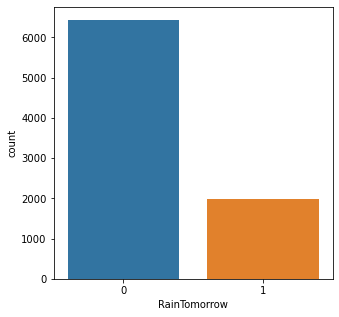

In [32]:
# chacking target values imbeleanceing

plt.figure(figsize=(5,5),facecolor='white')
sns.countplot(target)
plt.show()

In [33]:
# using smote for deal with imbelence data set

from imblearn.over_sampling import SMOTE

In [34]:
over_sampling = SMOTE(0.80)
df_final,target = over_sampling.fit_resample(final_df,target)

In [35]:
df_final

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,13.400000,22.900000,0.774597,2.174158,73.427770,6.633250,4.472136,24.000000,71.000000,22.000000,...,0,0,0,0,0,0,0,1,0,0
1,7.400000,25.100000,0.000000,2.174158,73.427770,6.633250,2.000000,22.000000,44.000000,25.000000,...,0,0,0,0,0,0,0,0,1,0
2,12.900000,25.700000,0.000000,2.174158,73.427770,6.782330,4.358899,26.000000,38.000000,30.000000,...,0,0,0,0,0,0,0,0,1,0
3,9.200000,28.000000,0.000000,2.174158,73.427770,4.898979,3.316625,9.000000,45.000000,16.000000,...,0,0,0,0,0,0,0,0,0,0
4,17.500000,32.300000,1.000000,2.174158,73.427770,6.403124,2.645751,20.000000,82.000000,33.000000,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11576,19.382423,25.597803,0.000000,3.446483,73.427770,6.244998,2.885439,7.000000,53.967042,48.989014,...,0,0,0,0,0,0,0,0,0,0
11577,16.435306,26.711769,0.000000,2.336113,73.427770,6.594090,4.335783,18.921619,42.882312,27.686243,...,0,0,0,0,0,0,0,0,0,0
11578,19.239500,25.538841,0.197346,2.174158,73.427770,6.447118,3.286137,28.764319,69.000000,59.273865,...,0,0,0,0,0,0,0,0,0,0
11579,13.193305,29.440410,0.643019,2.174158,73.427770,6.233806,3.373998,18.609729,67.822496,50.719701,...,0,0,0,0,0,0,0,0,0,0


In [36]:
target

0        0
1        0
2        0
3        0
4        0
        ..
11576    1
11577    1
11578    1
11579    1
11580    1
Name: RainTomorrow, Length: 11581, dtype: int64

In [43]:
# Let's check the VIF Score

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

scale = StandardScaler()
df_final_scale = scale.fit_transform(df_final)

vif = pd.DataFrame()
vif["VIF Score"] = [variance_inflation_factor(df_final_scale,i) for i in range(df_final_scale.shape[1])]
vif["Features"] = df_final.columns
vif.sort_values(by='VIF Score',ascending=False).head(10)

,VIF Score,Features
15,34.292502,Temp3pm
1,26.787814,MaxTemp
14,23.397953,Temp9am
10,21.762401,Pressure9am
11,20.955423,Pressure3pm
0,10.754371,MinTemp
9,6.542646,Humidity3pm
8,4.642310,Humidity9am
20,3.036362,Location_Melbourne
6,2.845544,WindSpeed9am


In [44]:
#some of columns has high co-related so we have to drop these columns

final_df = final_df.drop(columns=['Temp3pm','MaxTemp','Temp9am','Pressure9am','Pressure3pm','MinTemp'])

In [47]:
final_df.shape

(8425, 67)

Number of component explained 98% variance :  62


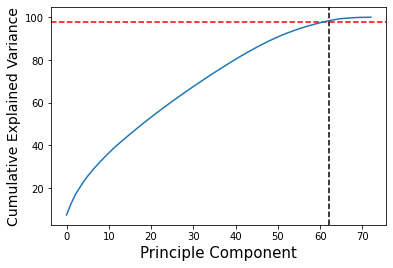

In [48]:
from sklearn.decomposition import PCA
from sklearn.metrics import explained_variance_score

x_pca = PCA()
x_pca.fit(df_final_scale)

var_cumu = np.cumsum(x_pca.explained_variance_ratio_)*100
k = np.argmax(var_cumu>98)

print("Number of component explained 98% variance : ",k)
plt.xlabel("Principle Component", fontsize=15)
plt.ylabel("Cumulative Explained Variance", fontsize=14)
plt.axvline(x=k, color='k', linestyle='--')
plt.axhline(y=98, color='r', linestyle='--')
plt.plot(var_cumu)
plt.show()

In [49]:
pca = PCA(n_components=62)

In [50]:
df_final_scale = pca.fit_transform(df_final_scale)

In [51]:
df_final_scale

array([[ 0.40867405,  1.1189354 , -1.40086138, ...,  0.15288952,
        -0.22111517,  0.28897722],
       [ 1.39176509, -0.22888885, -1.7820277 , ...,  0.17865722,
        -0.62241477,  0.69825975],
       [ 1.79297262,  0.52722921, -2.13917996, ..., -0.02241382,
        -1.46352201,  0.32827881],
       ...,
       [ 0.93161832,  0.69715191,  1.12723595, ..., -0.08879364,
         0.53415652,  0.49261807],
       [ 0.657845  , -0.71584587,  0.59992974, ..., -0.03008333,
        -0.6134363 ,  0.2306079 ],
       [-3.29503857,  0.81464611,  2.33108738, ..., -0.21188276,
        -0.22813023, -0.53121381]])

In [66]:
from sklearn.metrics import accuracy_score, plot_roc_curve,classification_report,confusion_matrix,roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, plot_roc_curve

In [58]:
#best modal for this data

def best_modal(mob):
    max_auc = 0
    max_state =0
    for i in range(21,101):
        x_train, x_test, y_train, y_test = train_test_split(df_final_scale,target,test_size=0.25, random_state = i)
        mob.fit(x_train, y_train)
        y_pred = mob.predict(x_test)
        score = accuracy_score(y_test, y_pred)
        if score > max_auc:
            max_auc = score
            max_state = i
    print("Best Accuracy Score corresponding ",max_state," is",max_auc)
    print("Cross Validation Score is : ",cross_val_score(mob,df_final_scale,target,cv=5).mean())
    print("Classification report is :\n",classification_report(y_test,y_pred))
    print("\n Confusion matrix is :\n",confusion_matrix(y_test,y_pred))
    print("\n Roc_Auc_Score is :\n",roc_auc_score(y_test,y_pred))

In [59]:
#LogisticRegression

from sklearn.linear_model import LogisticRegression
log_reg  = LogisticRegression()
best_modal(log_reg)

Best Accuracy Score corresponding  52  is 0.8580801104972375
Cross Validation Score is :  0.5091284438888654
Classification report is :
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1628
           1       0.84      0.80      0.82      1268

    accuracy                           0.84      2896
   macro avg       0.84      0.84      0.84      2896
weighted avg       0.84      0.84      0.84      2896


 Confusion matrix is :
 [[1427  201]
 [ 249 1019]]

 Roc_Auc_Score is :
 0.8400816933939963


In [60]:
#RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
rand_class = RandomForestClassifier()
best_modal(rand_class)

Best Accuracy Score corresponding  55  is 0.9185082872928176
Cross Validation Score is :  0.768505705743312
Classification report is :
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      1628
           1       0.95      0.84      0.89      1268

    accuracy                           0.91      2896
   macro avg       0.92      0.91      0.91      2896
weighted avg       0.92      0.91      0.91      2896


 Confusion matrix is :
 [[1574   54]
 [ 198 1070]]

 Roc_Auc_Score is :
 0.9053395236360536


In [61]:
#DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier()
best_modal(d_tree)

Best Accuracy Score corresponding  31  is 0.8656767955801105
Cross Validation Score is :  0.7322411953996256
Classification report is :
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      1628
           1       0.83      0.85      0.84      1268

    accuracy                           0.86      2896
   macro avg       0.85      0.86      0.86      2896
weighted avg       0.86      0.86      0.86      2896


 Confusion matrix is :
 [[1408  220]
 [ 193 1075]]

 Roc_Auc_Score is :
 0.8563283314860602


In [64]:
from sklearn.ensemble import AdaBoostClassifier
ada_class = AdaBoostClassifier()
best_modal(ada_class)

Best Accuracy Score corresponding  87  is 0.8383977900552486
Cross Validation Score is :  0.6925156331179843
Classification report is :
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1628
           1       0.79      0.79      0.79      1268

    accuracy                           0.82      2896
   macro avg       0.82      0.82      0.82      2896
weighted avg       0.82      0.82      0.82      2896


 Confusion matrix is :
 [[1365  263]
 [ 264 1004]]

 Roc_Auc_Score is :
 0.8151250978538045


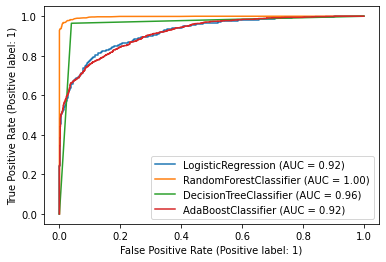

In [68]:
x_train, x_test, y_train, y_test = train_test_split(df_final_scale,target, test_size = 0.22, random_state = 96)

disp = plot_roc_curve(log_reg, x_test, y_test)
plot_roc_curve(rand_class, x_test, y_test, ax=disp.ax_)
plot_roc_curve(d_tree, x_test, y_test, ax=disp.ax_)
plot_roc_curve(ada_class, x_test, y_test, ax=disp.ax_)
plt.legend(prop={"size":10}, loc="lower right")
plt.show()

#### Random forest is best modal for this data.

In [71]:
import joblib
joblib.dump(rand_class,"Rainfall_prediction.pkl")

['Rainfall_prediction.pkl']